# A Deep Dive into the Movie Industry (IMDb Dataset)

With movie data from the last four decades, we will explore some of the key trends and take a deep dive into the industry behind these movies. After a brief look at the data, we can think of a number of possible questions. Some of the questions we address are as follows:

    1. How have movie budgets changed over time?
    2. Do certain genres cost more to make?
    3. Do certain genres make more money?
    4. Is movie budget correlated to gross revenue?
    5. How has movie budget and gross revenue changed over time?
    6. What release month is best in terms of revenue?
    6. Has genre popularity changed over time?
    7. Are longer movies rated higher?
    8. What genres score highest on average?
    9. Has female representation (on and off screen) changed over the last four decades?

# Our Dataset

Our dataset considers 6820 movies from IMDb, with roughly the top 200 movies per year (1980-2020) by popularity. This dataset is publicly available and can be found at https://www.kaggle.com/danielgrijalvas/movies. The dataset has the following attributes:

    ● budget: the budget of a movie. Some movies don't have this, so it appears as 0
    ● company: the production company
    ● country: country of origin
    ● director: the director
    ● genre: main genre of the movie.
    ● gross: revenue of the movie
    ● name: name of the movie
    ● rating: rating of the movie (R, PG, etc.)
    ● released: release date (YYYY-MM-DD)
    ● runtime: duration of the movie
    ● score: IMDb user rating
    ● votes: number of user votes
    ● star: main actor/actress
    ● writer: writer of the movie
    ● year: year of release
    
Citation: danielgrijalvas. (July, 2021). Movies. Retrieved [10/02/2022] from https://www.kaggle.com/danielgrijalvas/movies.

# Data Collection

In [119]:
#######################################################################################
# Initialise libraries 
#######################################################################################

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [118]:
#######################################################################################
# Read in data
#######################################################################################

# read in data to dataframe
data = pd.read_csv('movies.csv', index_col=False)

# look at data
data.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [105]:
# check for duplicates
print("Before duplicates removed: ",data.shape)
data = data.drop_duplicates()
print("After duplicates removed: ",data.shape)

Before duplicates removed:  (7668, 15)
After duplicates removed:  (7668, 15)


There were no duplicates within our dataset! So we will continue into our exploratory analysis and clean the data should it be necessary for certain questions.

# Correlation between all numeric features

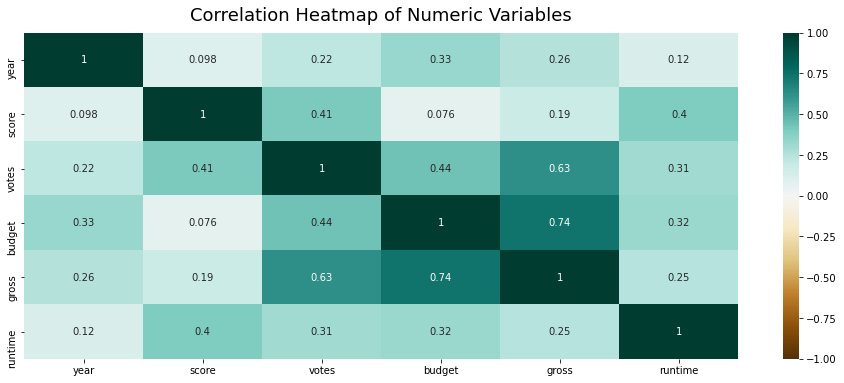

In [36]:
# Correlation between numeric columns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data[["year","score","votes","budget","gross","runtime"]].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap of Numeric Variables', fontdict={'fontsize':18}, pad=12);

Two strong correlations can be seen here between Budget vs. Gross and Votes vs. Gross.

# Where are movies being produced?

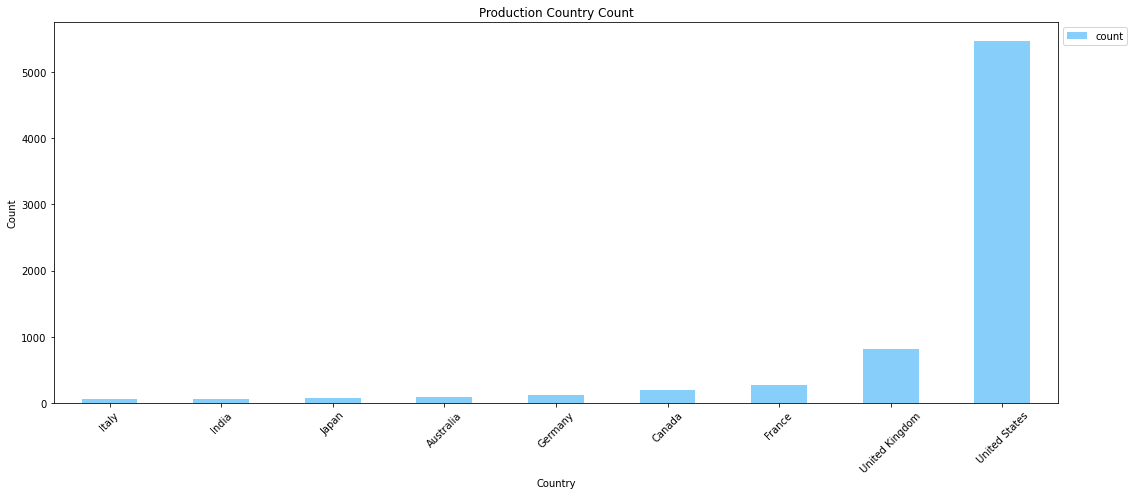

In [117]:
#######################################################################################
# Q.1 - Where are movies being produced?
#######################################################################################
year_with_countries = data[["country","year"]].groupby("country").count()
year_with_countries = year_with_countries.rename(columns={"year":"count"})
year_with_countries = year_with_countries.sort_values('count')

# for plotting purposes, remove counts lower than 50
year_with_countries = year_with_countries[year_with_countries["count"] > 50]

# plot
year_with_countries.plot.bar( figsize=(18, 7), color=["lightskyblue"])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Production Country Count")
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Unsurprisingly, most movies are being produced in the U.S. predominantly, followed by the U.K.

# How have budgets changed over time

Text(0, 0.5, 'Budget')

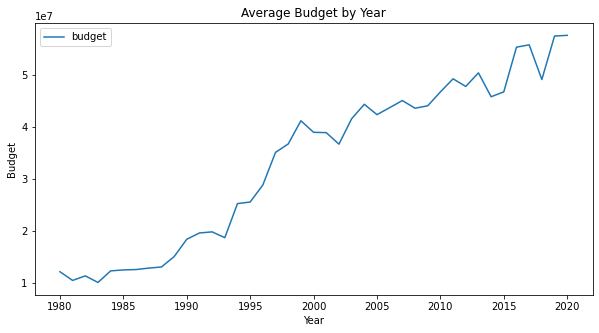

In [79]:
#######################################################################################
# Q.2 - How have budgets changed over time
#######################################################################################

# need to clean the data here as there are many cells with null values
budget_data = data.dropna(subset = ['budget'])

# separate our two columns
year_budget = budget_data[['year','budget']]

# plot yearly average budget for comparison
yearly_average_budget = year_budget.groupby('year').mean()

yearly_average_budget.plot(figsize=(10, 5))
plt.title("Average Budget by Year")
plt.xlabel('Year')
plt.ylabel("Budget")

Average budget in the movie industry has been increasing dramatically. Does our dataset consider inflation however?

# Do certain genres cost more to make?

In [85]:
#######################################################################################
# Q.3 - Do certain genres cost more to make
#######################################################################################

#gather data
year_genre_budget = budget_data[['year','genre','budget']]


# function to gather our genres by year and average budget into their own columns
def get_genre_group_columns(dataset, numeric_variable):
    output_dataset = data[["year",numeric_variable]].groupby('year').mean().drop(columns=numeric_variable)
    #iterate over genres
    for genre in dataset.genre.unique():
        genre_separated = dataset[dataset['genre'] == genre]
        genre_separated = genre_separated.drop(columns="genre")
        genre_separated = genre_separated.groupby("year").mean()
        output_dataset[genre] =  genre_separated[numeric_variable]
    
    return output_dataset

genre_average_budget_by_year = get_genre_group_columns(year_genre_budget, "budget")

genre_average_budget_by_year.head(10)

,Drama,Adventure,Action,Comedy,Horror,Biography,Crime,Fantasy,Sci-Fi,Animation,Family,Western,Thriller,History,Romance,Mystery
year,,,,,,,,,,,,,,,,
1980,8.060000e+06,1.375000e+07,1.941667e+07,5.990909e+06,6.166667e+05,2.075000e+07,7.825000e+06,2.000000e+07,11000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,1.741111e+07,1.016667e+07,1.287857e+07,9.488235e+06,3.095455e+06,1.416667e+07,1.001667e+07,NaN,NaN,6750000.0,NaN,NaN,NaN,NaN,NaN,NaN
1982,1.212500e+07,9.250000e+06,1.184667e+07,1.314780e+07,4.197222e+06,1.575000e+07,1.400000e+07,1.800000e+07,5000000.0,5250000.0,10500000.0,11000000.0,NaN,NaN,NaN,NaN
1983,7.069231e+06,1.671429e+07,1.480941e+07,7.237957e+06,5.250222e+06,1.000000e+07,1.158667e+07,1.900000e+07,15000000.0,4600000.0,NaN,NaN,2500000.0,323562.0,NaN,NaN
1984,1.137143e+07,2.300000e+07,1.571957e+07,7.722069e+06,2.919167e+06,1.087367e+07,1.908333e+07,NaN,NaN,1000000.0,NaN,NaN,NaN,NaN,22000000.0,NaN
1985,1.125278e+07,2.130769e+07,1.489240e+07,7.688000e+06,3.290000e+06,1.400000e+07,9.500000e+06,1.100000e+07,NaN,15750000.0,NaN,NaN,NaN,NaN,NaN,NaN
1986,9.825000e+06,1.850000e+07,1.463671e+07,1.183672e+07,7.583333e+06,6.652750e+06,1.048000e+07,NaN,18000000.0,10000000.0,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.416667e+07,1.394000e+07,1.658172e+07,1.244859e+07,4.529167e+06,1.357500e+07,1.010769e+07,3.666667e+06,NaN,NaN,NaN,NaN,10000000.0,NaN,NaN,NaN
1988,1.082609e+07,1.802167e+07,1.519130e+07,1.246620e+07,7.912500e+06,1.725000e+07,1.154545e+07,6.050000e+06,NaN,29300000.0,NaN,NaN,NaN,NaN,NaN,NaN


Many genres are rarely present every year in the top 200. 

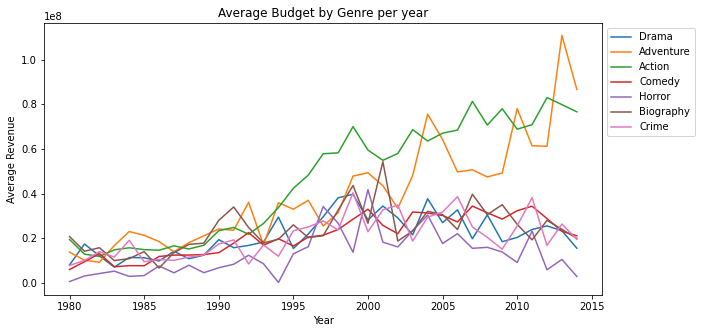

In [116]:
# remove 2020 from this plot
genre_average_budget_by_year = genre_average_budget_by_year[:-1]

# only consider genres that are present in every year
genre_average_budget_by_year = genre_average_budget_by_year.dropna(axis = 1)

# plot
genre_average_budget_by_year.plot(legend=False, mark_right=False, figsize=(10, 5)) 
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Average Budget by Genre per year")
plt.ylabel('Average Revenue')
plt.xlabel('Year')
plt.show()

Action and Adventure movies cost on average significantly more than the other most popular genres.

# Do certain genres make more money?

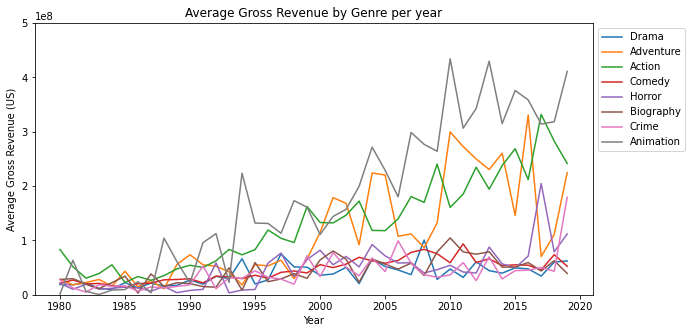

In [115]:
#######################################################################################
# Q.4 - Do certain genres make more money
#######################################################################################

# gather data
# need to clean the data here as there are many cells with null values
revenue_data = data.dropna(subset = ['gross'])
year_genre_revenue = revenue_data[['year','genre','gross']]

# recycle our previous genre dataset generator function
genre_average_gross_by_year = get_genre_group_columns(year_genre_revenue, "gross")

# remove 2020, keep genres present in every year
genre_average_gross_by_year = genre_average_gross_by_year[:-1]
genre_average_gross_by_year = genre_average_gross_by_year.dropna(axis = 1)

# plot figure
genre_average_gross_by_year.plot(legend=False, mark_right=False, figsize=(10, 5))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Average Gross Revenue by Genre per year")
plt.ylim(0, 500000000)
plt.ylabel('Average Gross Revenue (US)')
plt.xlabel("Year")
plt.show()

Animated, Action and Adventure all appear to make the highest average gross revenue. 

# Is a movies budget correlated to gross revenue?

In [7]:
#######################################################################################
# Q.5 - Is a movies budget correlated to gross revenue
#######################################################################################    

# Our revenue column has some null values which we will need to remove
# Since we are comparing to budget we can work with our cleaned budget dataset
revenue_budget_data = budget_data.dropna(subset = ['gross'])

# Calculate correlation
revenue_budget_data["budget"].corr(revenue_budget_data["gross"])    

0.7403948929894826

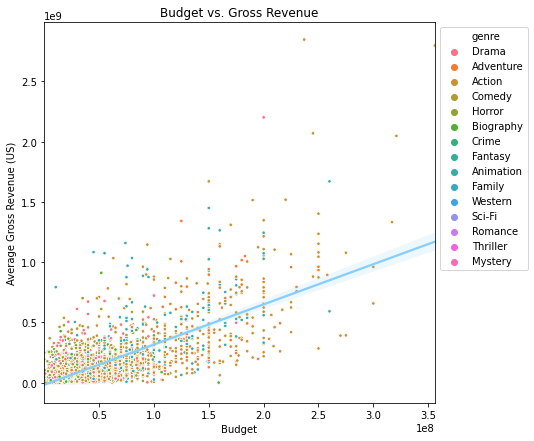

In [93]:
plt.figure(figsize=(7,7))
ax = sns.scatterplot(x='budget', y='gross', hue="genre", data=revenue_budget_data, s=12)
sns.regplot(data=revenue_budget_data, x='budget', y='gross', scatter=False, ax=ax, line_kws={"color": "lightskyblue"})
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Budget vs. Gross Revenue")
plt.ylabel('Average Gross Revenue (US)')
plt.xlabel('Budget')
plt.show()

There is a strong correlation between budget and gross revenue in the industry.

# Budget and Gross Revenue Together

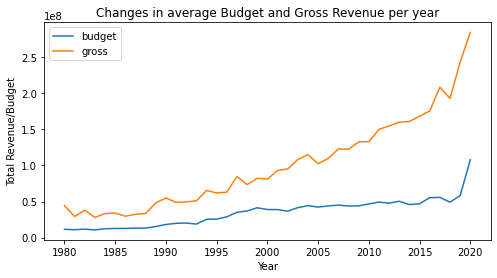

In [94]:
#######################################################################################
# Q.6 - How has total yearly average irrespective of genre changed per year
#######################################################################################

revenue_budget_no_genre = revenue_budget_data[["year","budget","gross"]].groupby("year").mean()   

    
revenue_budget_no_genre.plot(figsize=(8, 4))
plt.title("Changes in average Budget and Gross Revenue per year")
plt.ylabel("Total Revenue/Budget")
plt.xlabel('Year')
plt.show()

Revenue appears to be increasing more than the cost of producing the movies.

# How has genre popularity changed over time?

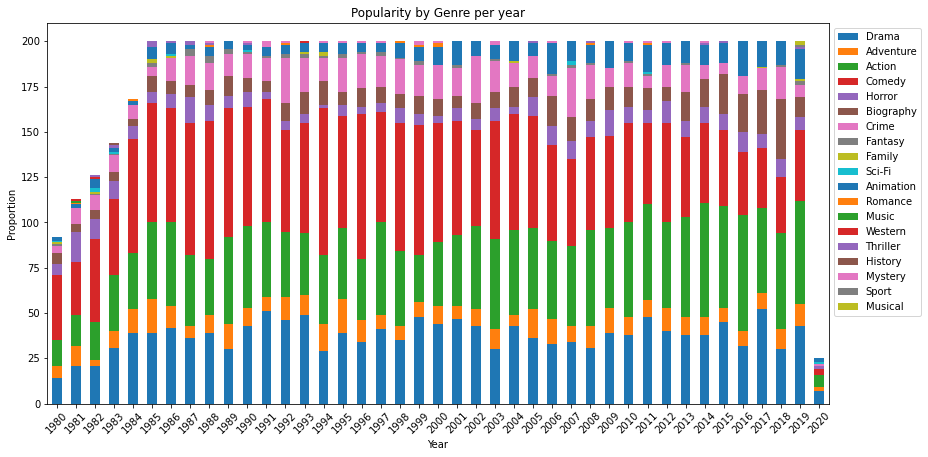

In [10]:
#######################################################################################
# Q.7 - How has genre popularity changed over time
#######################################################################################

year_with_genre = data[["year","genre"]]

# function to gather our genres by year and average budget into their own columns
def get_genre_count_columns(dataset, numeric_variable):
    output_dataset = data[["year",numeric_variable]].groupby('year').mean().drop(columns=numeric_variable)
    #iterate over genres
    for genre in dataset.genre.unique():
        genre_separated = dataset[dataset['genre'] == genre]
        genre_separated = genre_separated.groupby("year").count()
        output_dataset[genre] =  genre_separated["genre"]
    
    return output_dataset

year_with_genre_count = get_genre_count_columns(year_with_genre, "budget")
year_with_genre_count = year_with_genre_count.fillna(0) #replace nan with 0

#plot stacked barchart
year_with_genre_count.plot.bar(stacked=True, figsize=(14, 7))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Popularity by Genre per year")
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()


The same information can be plotted as a line graph, but is much less informative (see below)

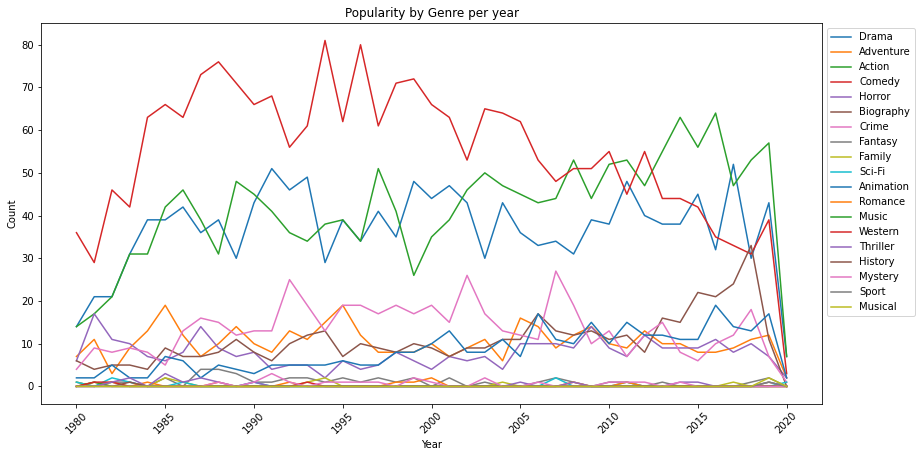

In [56]:
#plot as line
year_with_genre_count.plot(figsize=(14, 7))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Popularity by Genre per year")
plt.ylabel('Count')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

# What genre brings the best return on investment? (gross/budget)

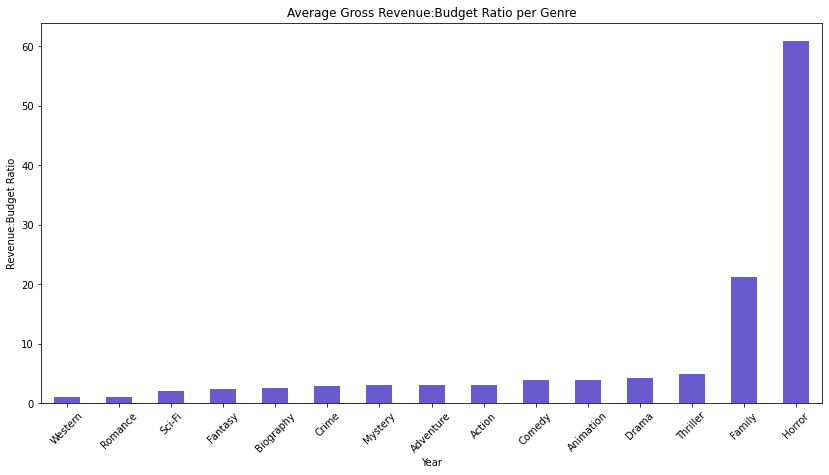

In [70]:
#######################################################################################
# Q.8 - What genre brings the best return on investment (gross/budget)
#######################################################################################

year_revenue_budget = data[["year", "genre", "gross","budget"]]
year_revenue_budget = year_revenue_budget.dropna()
year_revenue_budget["gross budget ratio"] = year_revenue_budget["gross"]/year_revenue_budget["budget"]
year_revenue_budget = year_revenue_budget.drop(columns=["gross","budget"])

# modify previous function to get means for each genre
# function to gather our genres by year and average budget into their own columns
def get_genre_mean_columns(dataset, numeric_variable):
    output_dataset = data[["year",numeric_variable]].groupby('year').mean().drop(columns=numeric_variable)
    #iterate over genres
    for genre in dataset.genre.unique():
        genre_separated = dataset[dataset['genre'] == genre]
        genre_separated = genre_separated.drop(columns=["genre"])
        genre_separated = genre_separated.groupby("year").mean()
        output_dataset[genre] =  genre_separated["gross budget ratio"]
    
    return output_dataset

year_revenue_budget_mean = get_genre_mean_columns(year_revenue_budget,"budget")


year_revenue_budget_mean.mean().sort_values().plot.bar(figsize=(14, 7),color=["slateblue"])
plt.title("Average Gross Revenue:Budget Ratio per Genre")
plt.xlabel('Year')
plt.ylabel('Revenue:Budget Ratio')
plt.xticks(rotation=45)
plt.show()

While Horror movies are not the most frequent in our dataset, those that do break into the top 200 most popular movies of the year have the highest revenue:budget ratio, i.e, highest return on investment.

# Are longer movies scored higher?

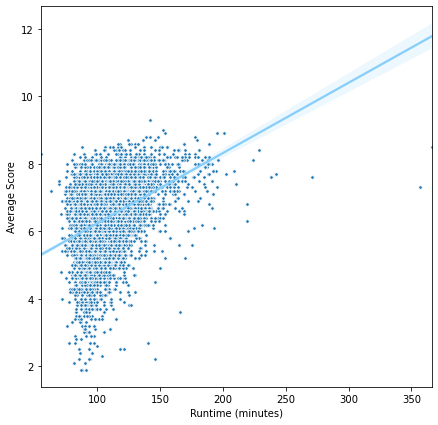

In [12]:
#######################################################################################
# Q.9 - Are longer movies scored higher
#######################################################################################

# Select Data
movies_score = data[["score", "runtime"]]
movies_score = movies_score.dropna()

# Plot scatter plot with trend line
plt.figure(figsize=(7,7))
ax = sns.scatterplot(x='runtime', y='score', data=movies_score, s=12)
sns.regplot(data=movies_score, x='runtime', y='score', scatter=False, ax=ax, line_kws={"color": "lightskyblue"})
plt.ylabel('Average Score')
plt.xlabel('Runtime (minutes)')
plt.show()

In [13]:
# Calculate correlation
movies_score["score"].corr(movies_score["runtime"]) 

0.3994510823646342

While we can see from the graph that longer movies appear to be rated higher on average, the overall correlation is moderately positive.

# Which genre rates highest?

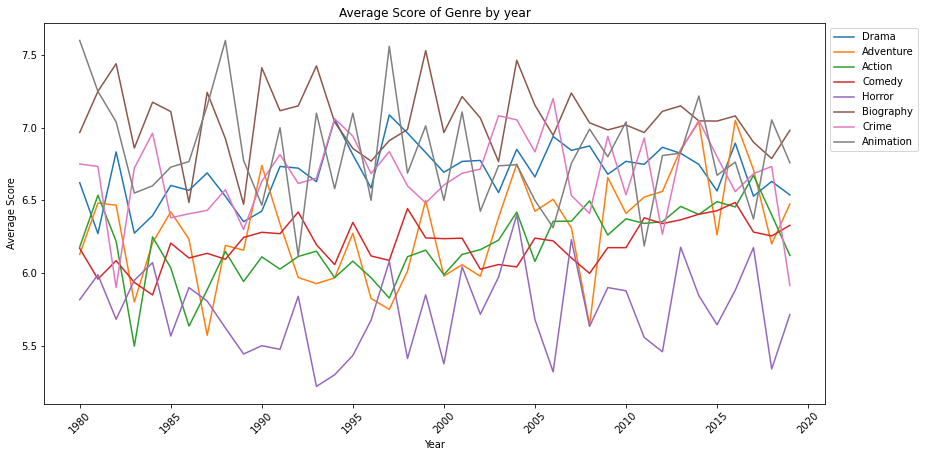

In [14]:
#######################################################################################
# Q.10 - Average score of genres per year
#######################################################################################

genre_with_year_score = data[["year", "genre", "score"]]
genre_with_year_score = genre_with_year_score.dropna()

#recycle earlier function
genre_with_year_score_dataset = get_genre_group_columns(genre_with_year_score, "score")
genre_with_year_score_dataset = genre_with_year_score_dataset[:-1]

#drop columsn with nan value
genre_with_year_score_dataset = genre_with_year_score_dataset.dropna(axis=1)

#plot
genre_with_year_score_dataset.plot(figsize=(14, 7))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Average Score of Genre by year")
plt.ylabel('Average Score')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

Plotting the trend lines of these points should make it a little clearer.

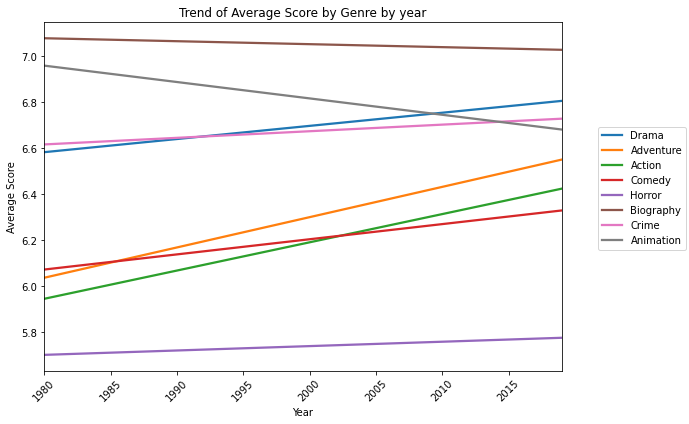

In [15]:
genre_with_year_score_dataset_new_index = genre_with_year_score_dataset.reset_index()
fig, ax = plt.subplots(figsize=(8, 6))
for genre in genre_with_year_score_dataset.columns:
    sns.regplot(data=genre_with_year_score_dataset_new_index, fit_reg=True, x='year', y=genre, scatter=False, ax=ax, ci=None)
fig.legend(labels=list(genre_with_year_score_dataset.columns), bbox_to_anchor=(1.2, .7))
plt.title("Trend of Average Score by Genre by year")
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Biography movies in this dataset on average trend the highest with drama following just after. Animation movies while being one of the highest on average trending genres has seen scores trending down, such that Drama and Crime movies appear to be overtaking it in how they are received (score).

# Which release month is best for revenue?

<function matplotlib.pyplot.show(*args, **kw)>

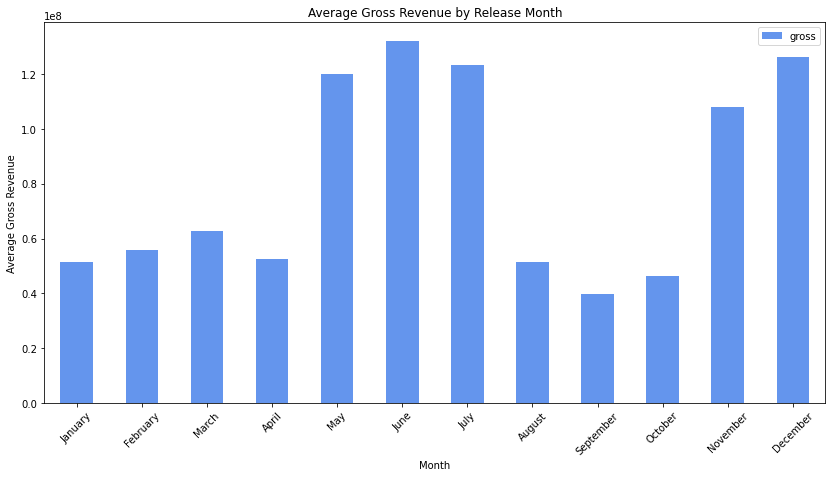

In [95]:
#######################################################################################
# Q.11 - Which release month is best in terms of revenue
#######################################################################################

# need to separate month from release data column
month_data = data.copy()
month_data["release month"] = month_data['released'].str.split(" ").str[0]

# capture in new dataframe and sort
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
month_data_average = month_data[["release month", "gross"]].groupby("release month").mean().tail(-8)

# reset index of dataframe
month_data_average = month_data_average.reset_index()

month_data_average['release month'] = pd.Categorical(month_data_average['release month'], categories=months, ordered=True)
month_data_average = month_data_average.sort_values('release month')  

# plot bar chart
month_data_average.plot.bar(x="release month",y="gross", figsize=(14, 7),color=["cornflowerblue"])
plt.title("Average Gross Revenue by Release Month")
plt.xlabel('Month')
plt.ylabel('Average Gross Revenue')
plt.xticks(rotation=45)
plt.show

On average the summer months of May, June, July as well as December do the best in terms of gross revenue return.

# Has female representation if the movie industry been changing?

This question was inspired by the following article (see: https://towardsdatascience.com/bechdel-test-comparing-female-representation-metrics-in-movies-6cbade15010f) which explores movies and how they are scored in the Bechdel Test, a test which measures the representation of women in fiction. This was a really interesting analysis and I encourage you to take a look at that article if this question interests you!

An important caveat that must be considered is how we are assigning gender classes. While we do not have self reported gender classes in our original dataset, we followed the approach of the aforemention Bechdel Test analyis. If a name is typically strongly associated with being Female, we will class that name as Female, and vice verse for Male. Therfore, there will be instances of incorrect gender assignment in this analysis. Any names which are ambiguous or unknown will be excluded from this analysis.

Results or conclusions from the proceeding sections should be taken sceptically. 

If "Actor" "Actress" assignment on IMDb is accurate (self reported), scraping this information would be a significantly better approach. 

In [16]:
#######################################################################################
# Q.12 - Has female representation been increasing (on and off screen)
#######################################################################################

# Need to guess gender based on first name as we don't have this feature labelled
# Add these to new dataframe

import gender_guesser.detector as gender

gender_data = data.copy()

# Remove second names from this column
gender_data['director'] = gender_data['director'].str.split(" ").str[0]
gender_data['writer'] = gender_data['writer'].str.split(" ").str[0]
gender_data['star'] = gender_data['star'].str.split(" ").str[0]


# map gender classification for each name to a new column
gender_data["Director"] = gender_data['director'].map(lambda x: gender.Detector().get_gender(x))
gender_data["Writer"] = gender_data['writer'].map(lambda x: gender.Detector().get_gender(x))
gender_data["Star"] = gender_data['star'].map(lambda x: gender.Detector().get_gender(x))


# generating these columns was computationally expensive, so we will save these to a csv
#gender_data.to_csv('genderdata.csv', index=False)

In [ ]:
###############################################
# Director
###############################################

# clean the data
gender_director = gender_data[["year", "Director"]]
gender_director.loc[(gender_director["Director"] == "mostly_female"), "Director"] = "female"
gender_director.loc[(gender_director["Director"] == "mostly_male"), "Director"] = "male"

# remove any ambiguous or unknown names
gender_director = gender_director[(gender_director.Director == "male") | (gender_director.Director == "female")]


#slight modification of a previous function to get counts for each year and gender
def get_gender_count_columns(dataset, role, numeric_variable):
    output_dataset = data[["year",numeric_variable]].groupby('year').mean().drop(columns=numeric_variable)
    #iterate over genres
    for genders in gender_director.Director.unique():
        genre_separated = dataset[dataset[role] == genders]
        genre_separated = genre_separated.groupby("year").count()
        output_dataset[genders] =  genre_separated[role]
    
    return output_dataset

gender_director_counts = get_gender_count_columns(gender_director, "Director", "budget") 
gender_director_counts = gender_director_counts[:-1]

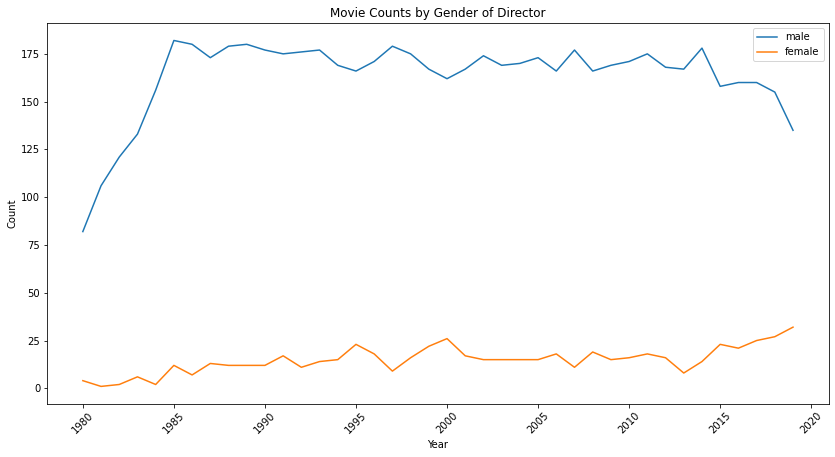

In [19]:
# plot counts
gender_director_counts.plot(figsize=(14, 7))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Movie Counts by Gender of Director")
plt.ylabel('Count')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

This graph shows that there are significantly more men in the director role per year than women. To be clearer, we will futher plot graphs as a proportion of the total female/male count.

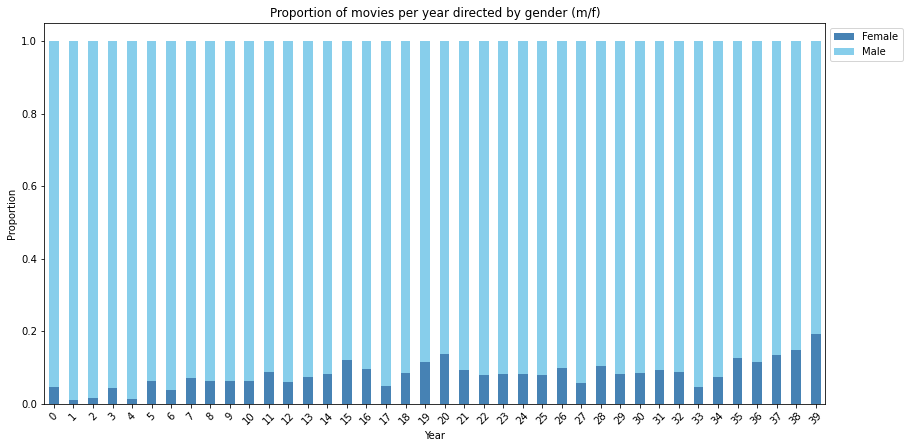

In [114]:
# make counts proportional
gender_director_counts["Total Entries"] = gender_director_counts['female'] + gender_director_counts['male']
gender_director_counts['male_proportional'] = gender_director_counts['male']/gender_director_counts["Total Entries"]
gender_director_counts['female_proportional'] = gender_director_counts['female']/gender_director_counts["Total Entries"]

# plot stacked barchart
gender_director_counts[["female_proportional", "male_proportional"]].plot.bar(stacked=True, figsize=(14, 7), color=["steelblue", "skyblue"])
plt.legend(labels=("Female", "Male"),bbox_to_anchor=(1.0, 1.0))
plt.title("Proportion of movies per year directed by gender (m/f)")
plt.ylabel('Proportion')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

We can see a suspected general upward trend in the proportion of female directors over the years.

In [28]:
###############################################
# Star
###############################################

# clean the data
gender_star = gender_data[["year", "Star"]]
gender_star.loc[(gender_star["Star"] == "mostly_female"), "Star"] = "female"
gender_star.loc[(gender_star["Star"] == "mostly_male"), "Star"] = "male"

# remove any ambiguous or unknown names
gender_star = gender_star[(gender_star.Star == "male") | (gender_star.Star == "female")]


gender_star_counts = get_gender_count_columns(gender_star, "Star", "budget") 
gender_star_counts = gender_star_counts[:-1]

# need this to be proportional
gender_star_counts["Total Entries"] = gender_star_counts['female'] + gender_star_counts['male']
gender_star_counts['male_proportional'] = gender_star_counts['male']/gender_star_counts["Total Entries"]
gender_star_counts['female_proportional'] = gender_star_counts['female']/gender_star_counts["Total Entries"]

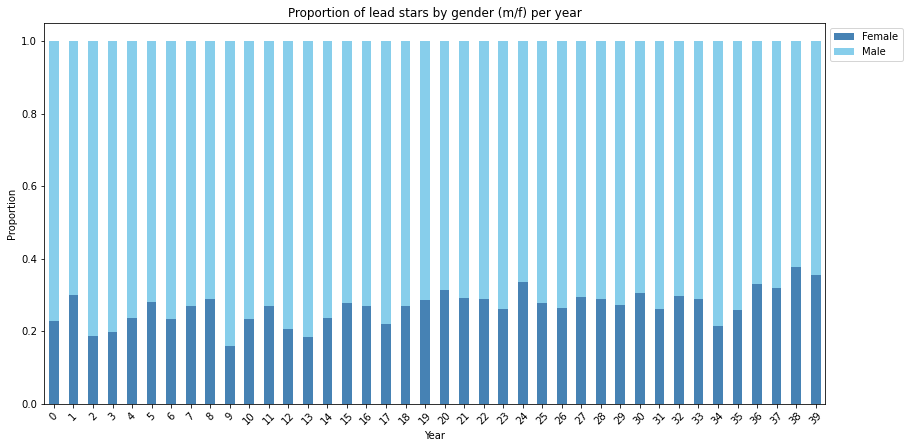

In [100]:
#plot stacked barchart
gender_star_counts[["female_proportional", "male_proportional"]].plot.bar(stacked=True, figsize=(14, 7), color=["steelblue", "skyblue"])
plt.legend(labels=("Female", "Male"),bbox_to_anchor=(1.0, 1.0))
plt.title("Proportion of lead stars by gender (m/f) per year")
plt.ylabel('Proportion')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

While it may look like there is a slight increasing trend in lead Star casting as Female, it does not appear to be as strong as in the Director category.

In [31]:
###############################################
# Writer
###############################################

# clean the data
gender_writer = gender_data[["year", "Writer"]]
gender_writer.loc[(gender_writer["Writer"] == "mostly_female"), "Writer"] = "female"
gender_writer.loc[(gender_writer["Writer"] == "mostly_male"), "Writer"] = "male"

# remove any ambiguous or unknown names
gender_writer = gender_writer[(gender_writer.Writer == "male") | (gender_writer.Writer == "female")]


gender_writer_counts = get_gender_count_columns(gender_writer, "Writer", "budget") 
gender_writer_counts = gender_writer_counts[:-1]

# need this to be proportional
gender_writer_counts["Total Entries"] = gender_writer_counts['female'] + gender_writer_counts['male']
gender_writer_counts['male_proportional'] = gender_writer_counts['male']/gender_writer_counts["Total Entries"]
gender_writer_counts['female_proportional'] = gender_writer_counts['female']/gender_writer_counts["Total Entries"]

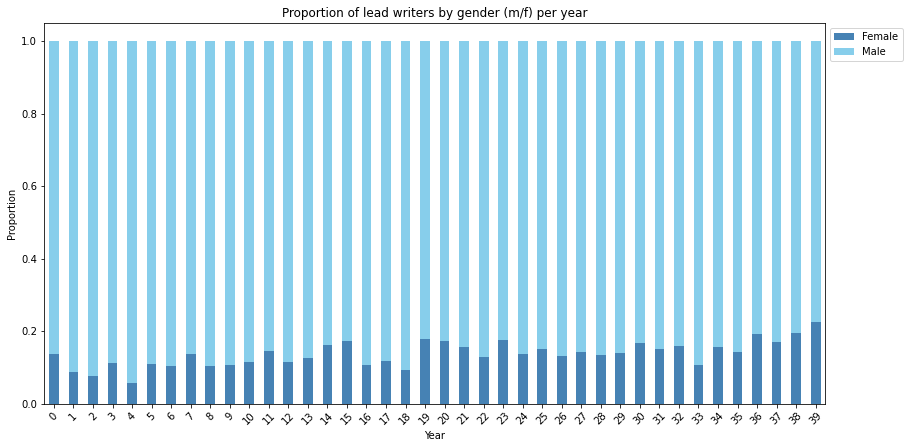

In [101]:
#plot stacked barchart
gender_writer_counts[["female_proportional", "male_proportional"]].plot.bar(stacked=True, figsize=(14, 7), color=["steelblue", "skyblue"])
plt.legend(labels=("Female", "Male"),bbox_to_anchor=(1.0, 1.0))
plt.title("Proportion of lead writers by gender (m/f) per year")
plt.ylabel('Proportion')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()


Likewise to the Star category, we see what looks like a slight upward trend, however, not as prominent as we see in the Director category.

Let's plot the trending lines for each of these categories to directly compare.

Text(0.5, 0, 'Year')

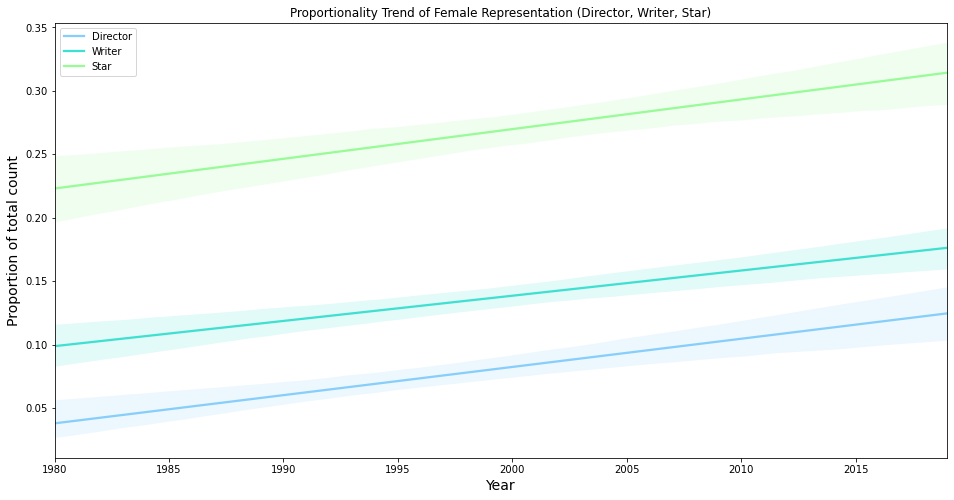

In [112]:
# just plot trend lines for director, writer, star

# reset index so we can work with the year column
gender_director_counts = gender_director_counts.reset_index()
gender_writer_counts = gender_writer_counts.reset_index()
gender_star_counts = gender_star_counts.reset_index()

# plot these in the same plot
plt.figure(figsize=(16, 8))
plt.title('Proportionality Trend of Female Representation (Director, Writer, Star)')
sns.regplot(x='year', y='female_proportional', data=gender_director_counts, scatter=False, line_kws={"color": "lightskyblue"})
sns.regplot(x='year', y='female_proportional', data=gender_writer_counts, scatter=False, line_kws={"color": "turquoise"})
sns.regplot(x='year', y='female_proportional', data=gender_star_counts, scatter=False, line_kws={"color": "palegreen"})
plt.legend(labels=["Director", "Writer", "Star"])
plt.ylabel("Proportion of total count", fontsize=14)
plt.xlabel("Year", fontsize=14)

We can very clearly see a strong upward trend across our three positions. Most notably, on screen representation (star) has the highest proportion female representation across our time period.

Interestingly, the Bechdel Test measures three different features outside of the whether or not the lead actor is female, it would be interesting to explore how these movies score in the Bechdel Test overall.

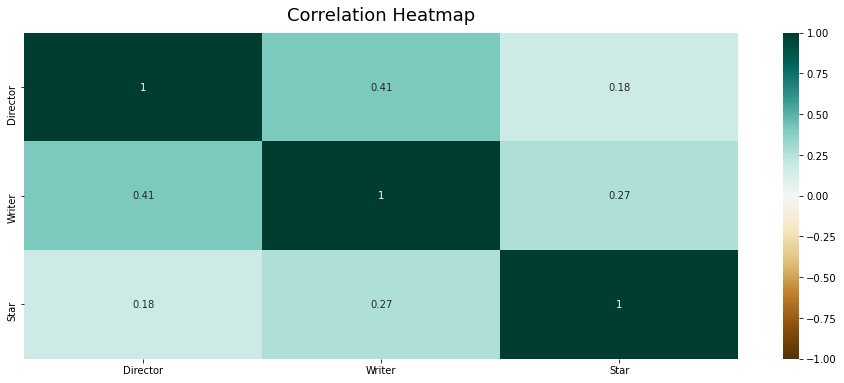

In [113]:
#######################################################################################
# Q.13 - Is female representation correlated across our three roles (dir, writer, star)
#######################################################################################

gender_data_combined = gender_director["Director"]
gender_data_combined = gender_data_combined.to_frame()
gender_data_combined["Writer"] = gender_writer["Writer"]
gender_data_combined["Star"] = gender_star["Star"]

#remove rows where there isn't a classification for each of the three roles
gender_data_combined = gender_data_combined.dropna(axis=0)

# encode female as 1, male as 0
for role in list(gender_data_combined.columns.values):
    gender_data_combined.loc[(gender_data_combined[role] == "female"), role] = 1
    gender_data_combined.loc[(gender_data_combined[role] == "male"), role] = 0

gender_data_combined = gender_data_combined.astype(float)

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(gender_data_combined.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

Interestingly, there is a moderate correlation between the classification of a director as Female with a writer also being classified as Female. Perhaps female led movies have better overall representation in off screen roles. The correlation between onscreen representation isn't very strong, with only a weakly positive correlation (0.18 - Director vs Star).

These findings are interesting and warrant further exploration in a more valid dataset where we can be reliably confident with gender classifications.

# Discussion

This exploratory analysis gave great insight into some of the features of the most popular movies of each year. While there has been some limitations in analysis, such as missing values, incomplete data for certain years, identifying proxies for certain questions, weaknesses have been documented and possible improvements suggested. 

While every effort has been made to explain the process behind answering certain questions, I welcome any areas of improvement that may be present!

I hope you enjoyed this analysis of the movie industry!